In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('F:/DATA SCIENCE/BLACK FRIDAY/Black-friday/BlackFriday.csv')

#The above code loads Data File(data) into the Jupyter.

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
print(data.shape)           # prints the shape of the dataset
print('\n',data.columns)    # prints the name of the columns in the dataset

(537577, 12)

 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
data_num=data.select_dtypes(include=[np.number])
#Filters Numericals from the overall data

data_cat=data.select_dtypes(include=['object'])
#Filters Categorical/Words from the overall data

In [7]:
print(data_num.columns)
print(data_cat.columns)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [8]:
(data_num.isnull().sum().sort_values(ascending=False))

# Finding the empty cells and sorts in descending order for convenience

Product_Category_3    373299
Product_Category_2    166986
Purchase                   0
Product_Category_1         0
Marital_Status             0
Occupation                 0
User_ID                    0
dtype: int64

In [9]:
data_num['Product_Category_2'] = data_num['Product_Category_2'].fillna(0)
data_num['Product_Category_3'] = data_num['Product_Category_3'].fillna(0)
# Filling the null values with 0 (zeroes)

(data_num.isnull().sum().sort_values(ascending=False))

C:\Users\prana\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\prana\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Purchase              0
Product_Category_3    0
Product_Category_2    0
Product_Category_1    0
Marital_Status        0
Occupation            0
User_ID               0
dtype: int64

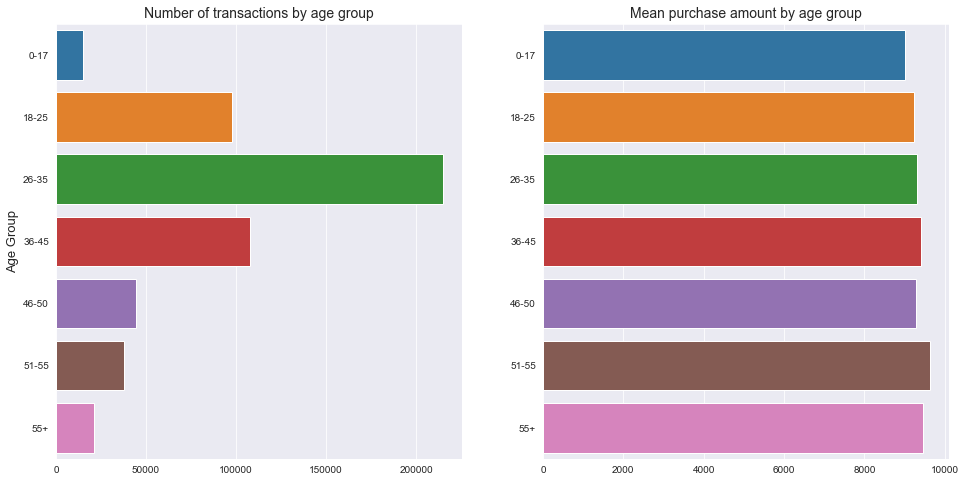

In [10]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(y='Age', data=data, order=sorted(data.Age.unique()))
plt.title('Number of transactions by age group', size=14)
plt.xlabel('')
plt.ylabel('Age Group', size=13)
plt.subplot(122)
age_gb = data[['Age', 'Purchase']].groupby('Age', as_index=False).agg('mean')
sns.barplot(y='Age', x='Purchase', data=age_gb, order=sorted(data.Age.unique()))
plt.title('Mean purchase amount by age group', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Plots Number of transaction with respect to age groups and the amount spend by them.

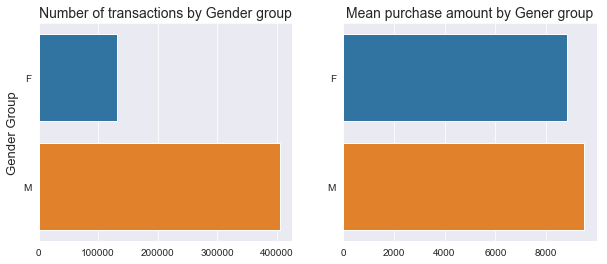

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.countplot(y='Gender', data=data, order=sorted(data.Gender.unique()))
plt.title('Number of transactions by Gender group', size=14)
plt.xlabel('')
plt.ylabel('Gender Group', size=13)
plt.subplot(122)
Gender_gb = data[['Gender', 'Purchase']].groupby('Gender', as_index=False).agg('mean')
sns.barplot(y='Gender', x='Purchase', data=Gender_gb, order=sorted(data.Gender.unique()))
plt.title('Mean purchase amount by Gener group', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Plots Number of transaction with respect to gender and the amount spend by them.

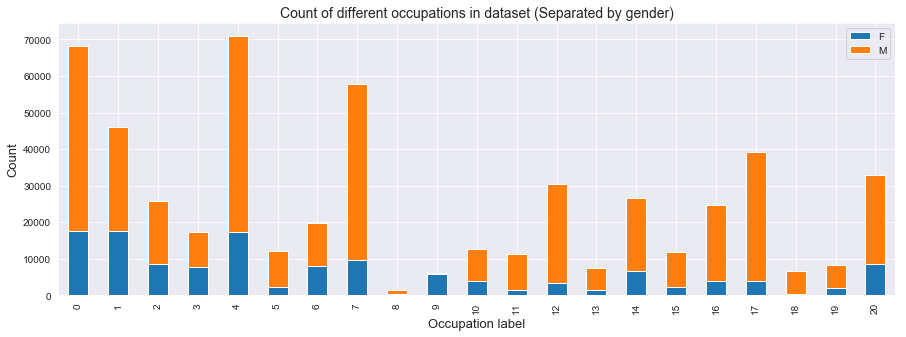

In [12]:

men = data[data.Gender == 'M']['Occupation'].value_counts(sort=False)
women = data[data.Gender == 'F']['Occupation'].value_counts(sort=False)
pd.DataFrame({'M': men, 'F': women}, index=range(0,21)).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 5)
plt.title("Count of different occupations in dataset (Separated by gender)", size=14)
plt.legend(loc="upper right")
plt.xlabel('Occupation label', size=13)
plt.ylabel('Count', size=13)
plt.show()

# Plots Number of transaction with respect to occupation and the amount spend by them.

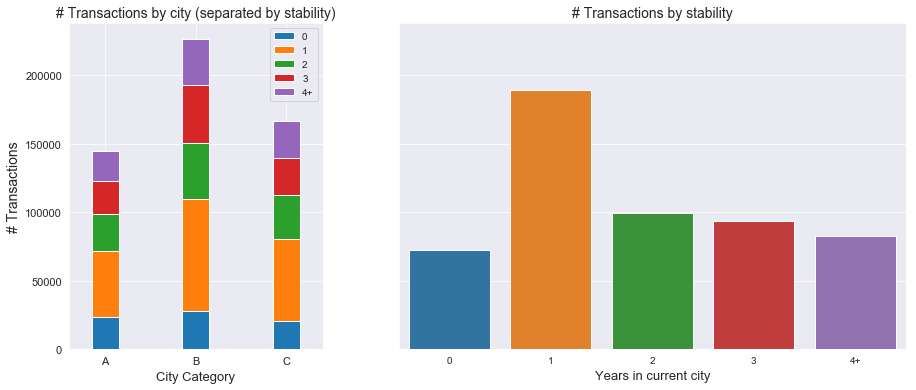

In [13]:
stay_years = [data[data.Stay_In_Current_City_Years == x]['City_Category'].value_counts(sort=False).iloc[::-1] for x in sorted(data.Stay_In_Current_City_Years.unique())]

f, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 2]}, sharey=True)

years = sorted(data.Stay_In_Current_City_Years.unique())
pd.DataFrame(stay_years, index=years).T.plot.bar(stacked=True, width=0.3, ax=ax1, rot=0, fontsize=11)
ax1.set_xlabel('City Category', size=13)
ax1.set_ylabel('# Transactions', size=14)
ax1.set_title('# Transactions by city (separated by stability)', size=14)

sns.countplot(x='Stay_In_Current_City_Years', data=data, ax=ax2, order=years)
ax2.set_title('# Transactions by stability', size=14)
ax2.set_ylabel('')
ax2.set_xlabel('Years in current city', size=13)

plt.gcf().set_size_inches(15, 6)
plt.show()

# Plots Number of transaction with respect to stay in the city and the amount spend.

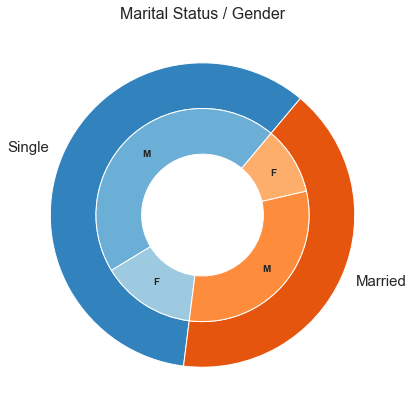

In [15]:
out_vals = data.Marital_Status.value_counts()
in_vals = np.array([data[data.Marital_Status==x]['Gender'].value_counts() for x in [0,1]]).flatten()

fig, ax = plt.subplots(figsize=(7, 7))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6]))

ax.pie(out_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Single', 'Married'],
       textprops={'fontsize': 15}, startangle=50)

ax.pie(in_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['M', 'F', 'M', 'F'],
       labeldistance=0.75, textprops={'fontsize': 12, 'weight': 'bold'}, startangle=50)

ax.set(aspect="equal")
plt.title('Marital Status / Gender', fontsize=16)
plt.show()

# Data visualization with respect to gender.

In [16]:
del data_num['User_ID']
#del data_num['Product_Category_1']
#del data_num['Product_Category_2']
#del data_num['Product_Category_3']
data['Product_Category_2'] = data['Product_Category_2'].fillna(0)
data['Product_Category_3'] = data['Product_Category_3'].fillna(0)

In [17]:
data_cat.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [18]:
le=LabelEncoder()

In [19]:
data_cat_enc = data_cat.apply(le.fit_transform)

# encoding categoricals to numericals to apply algorithm.

In [20]:
DATA = pd.concat([data_cat_enc,data_num],axis = 1)
DATA.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,670,0,0,0,2,10,0,3,0.0,0.0,8370
1,2374,0,0,0,2,10,0,1,6.0,14.0,15200
2,850,0,0,0,2,10,0,12,0.0,0.0,1422
3,826,0,0,0,2,10,0,12,14.0,0.0,1057
4,2732,1,6,2,4,16,0,8,0.0,0.0,7969


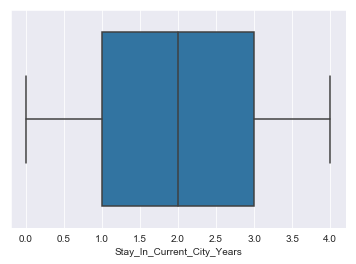

In [21]:
sns.boxplot(x=DATA['Stay_In_Current_City_Years'])

In [22]:
DATA = DATA.loc[(DATA['Stay_In_Current_City_Years'] <=3) & (DATA['Stay_In_Current_City_Years']>=1)]

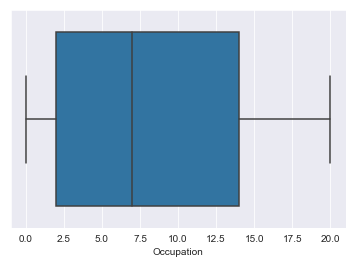

In [23]:
sns.boxplot(x=DATA['Occupation'])

In [24]:
DATA = DATA.loc[(DATA['Occupation'] <=14) & (DATA['Occupation']>=1)]

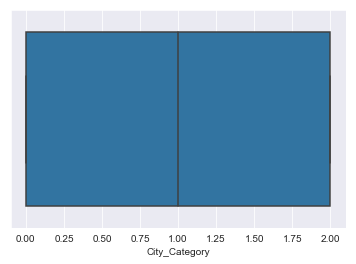

In [25]:
sns.boxplot(x=DATA['City_Category'])

In [26]:
TrainingDATA = pd.concat([DATA,DATA])

In [27]:
TrainingDATA.shape

(494610, 11)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
XX=TrainingDATA.drop(["Purchase"],axis=1)

In [30]:
YY=TrainingDATA["Purchase"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.2)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(395688, 10)
(98922, 10)
(395688,)
(98922,)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [34]:
RF = RandomForestRegressor()

In [35]:
model = RF.fit(X_train,y_train)

In [36]:
model.score(X_train,y_train)

0.93750038196357155

In [37]:
y_pred = model.predict(X_test)

In [38]:
r2_score(y_test,y_pred)

0.83394552897670993

# Grid Search to find Best Parameters

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV

In [40]:
params = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [3, 5, 7, 9]
}

In [41]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 150], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
preds = grid_search.predict(X_test)

In [44]:
print("Best params found: {}".format(grid_search.best_params_))
print("RMSE score: {}".format(mean_squared_error(y_test, preds) ** 0.5))

Best params found: {'n_estimators': 100, 'max_depth': 9}
RMSE score: 2846.137669084973


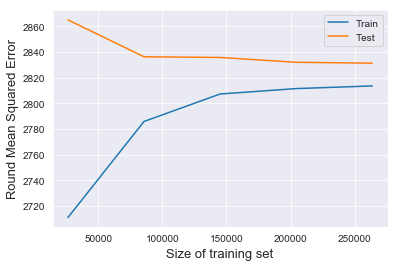

In [45]:
sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(**grid_search.best_params_), X_train, y_train, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
train_scores = np.mean((-1*train_scores)**0.5, axis=1)
test_scores = np.mean((-1*test_scores)**0.5, axis=1)
sns.lineplot(sizes, train_scores, label="Train")
sns.lineplot(sizes, test_scores, label="Test")
plt.xlabel("Size of training set", size=13)
plt.ylabel("Round Mean Squared Error", size=13)
plt.show()

# Applying KFold with Best Parameters

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, r2_score

from sklearn.ensemble import RandomForestRegressor

In [47]:
RandFor_0=RandomForestRegressor(n_estimators = 100 , max_depth = 9)

In [48]:
algo_dict = {"RF":RandFor_0}
algo_train_scores={}
algo_test_scores={}

In [49]:
# Function to run multiple algorithms with different K values of KFold.

def train_test_evaluate_with_kFold(train_data,kmax,algo):
    test_scores={}
    train_scores={}
    
    for k in range (2,kmax,1):
        kf = KFold(n_splits=k)
        sum_train = 0
        sum_test = 0
        
        #data = housetraindf1
        data = train_data
        
        for train, test in kf.split(data):
            
            #train_data = np.array(data)[train]
            #test_data = np.array(data)[test]
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["Purchase"],axis=1)
            y_train = train_data["Purchase"]
            x_test = test_data.drop(["Purchase"],axis=1)
            y_test = test_data["Purchase"]
             # Train/Test Splitting
            
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            # Applying Algorithm to the training model 

            y_pred = algo_model.predict(x_test)
            sum_test += r2_score(y_test,y_pred)
            # Predicting test scores
        
        average_test = sum_test/k
        average_train = sum_train/k
        # Taking avg of train and test score for each K value

        test_scores[k] = average_test
        train_scores[k] = average_train
        print("kvalue: ",k)
        
    return (train_scores,test_scores)

In [50]:
max_kfold = 12
for algo_name in algo_dict.keys():
    print(algo_name)
    train_score, test_score = train_test_evaluate_with_kFold(TrainingDATA,max_kfold+1,algo_dict[algo_name])
    algo_train_scores[algo_name]=train_score
    algo_test_scores[algo_name]=test_score
    
print(algo_train_scores)
print("------------------------------------------------------------")
print(algo_test_scores)

RF
kvalue:  2
kvalue:  3
kvalue:  4
kvalue:  5
kvalue:  6
kvalue:  7
kvalue:  8
kvalue:  9
kvalue:  10
kvalue:  11
kvalue:  12
{'RF': {2: 0.68002975075147754, 3: 0.682064997472834, 4: 0.68493671114620391, 5: 0.68577709297985723, 6: 0.68745832182384692, 7: 0.68895793425155027, 8: 0.69047476121640106, 9: 0.69117773282200989, 10: 0.69027930722433706, 11: 0.69232349222174971, 12: 0.69217645813396256}}
------------------------------------------------------------
{'RF': {2: 0.68002975075147754, 3: 0.67517077006579829, 4: 0.67618198513345029, 5: 0.67444449071579538, 6: 0.67363667656108028, 7: 0.6735278945369666, 8: 0.67305157315272457, 9: 0.67124574301422257, 10: 0.66915654480603526, 11: 0.66914507748953056, 12: 0.66691466931946186}}


In [51]:
test_scores_df=pd.DataFrame(algo_test_scores)
train_scores_df=pd.DataFrame(algo_train_scores)

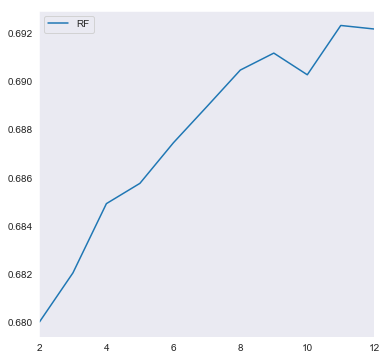

In [52]:
train_scores_df.plot(figsize=(6,6))
plt.grid()

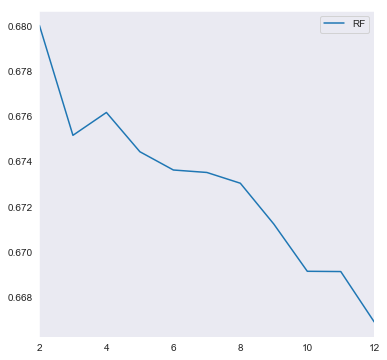

In [53]:
test_scores_df.plot(figsize=(6,6))
plt.grid()